**Name-Nilesh Vinayak Dhumal**

**Machine Learning project- Loan Prediction**

**#Goal- loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Projects/Machine Learning Project/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**1.As can be seen, the 13 columns. It also can be seen that there are 614 observations in the data set.**

**2.Most of the column are object datatype excepts ApplicantIncome , Coapplicantincome,Loan_amount,Loan_amount_term,Credit_history i.e int64 and float64**

**3.We can see that there’s some missing data**

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**1.Some variables have missing values that we’ll have to deal with , and also there seems to be some outliers for the Applicant Income , Coapplicant income and Loan Amount.** 

**2.We also see that about 84% applicants have a credit_history. Because the mean of Credit_History field is 0.84 and it has either (1 for having a credit history or 0 for not)**

**3.Skewness The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed (Mean>median)**

**4.Applicant Income is 150 Minimum and 81000 Maximum**

**5.Loan_amount_term in days i.e tenure of loan (360 days Maximum tenure and 12 days Min Tenure)**

**6.In loan_amount 68% data lies between 61 to 231**
  
  **In loan_amount_term 68% lies between 277 to 407**



**#Exploratory Data Analysis**

**#We can see that there’s some missing data**

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



**#Check evry column what they represent**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**EDA for categoricals Columns**

**#Loan_Id Column**

In [ ]:
df.Loan_ID.value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

**#It can be seen that there are 614 unique ID in the dataset. no duplicate id is present**

**Gender**

In [ ]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

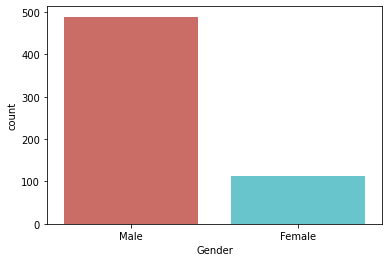

In [ ]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

**# From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.**

**#Married Status**

In [ ]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

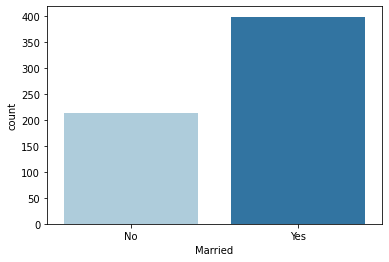

In [ ]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

**# The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column.**

**#Educational**

In [ ]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

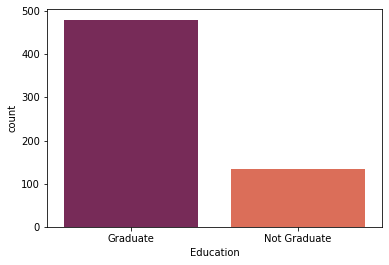

In [ ]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

**#The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.**

**#Self Employee**

In [ ]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

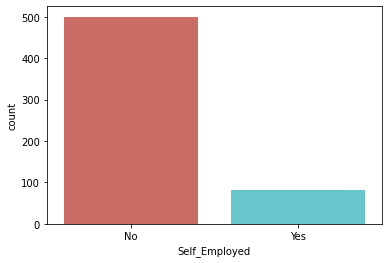

In [ ]:
sns.countplot(x="Self_Employed", data=df, palette="hls")
plt.show()

**# The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.**

**#Credit_History**

In [ ]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

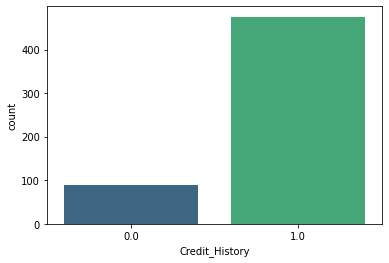

In [ ]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

**#The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.**

**#Property Area**

In [ ]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

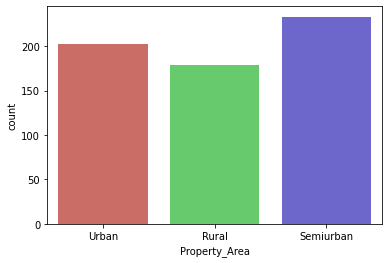

In [ ]:
sns.countplot(x="Property_Area", data=df, palette="hls")
plt.show()

**# This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.**

**#Loan Status**

In [ ]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

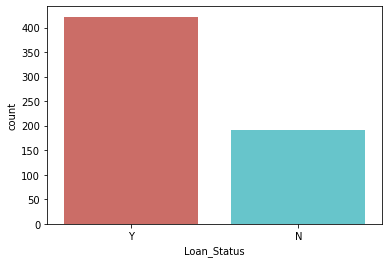

In [ ]:
sns.countplot(x="Loan_Status", data=df, palette="hls")
plt.show()

**#The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.**

**#Loan Amount Term**

In [ ]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

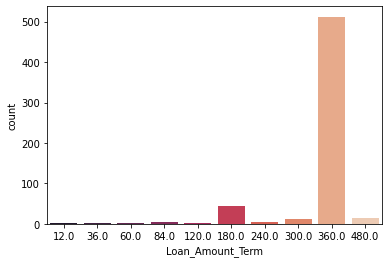

In [ ]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

**# As can be seen from the results, the 360 days loan duration is the most popular compared to others.**

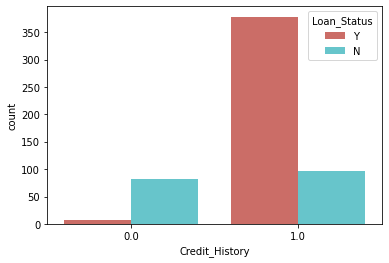

In [ ]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=df,palette="hls")

In [ ]:
df[["ApplicantIncome",	"CoapplicantIncome",	"LoanAmount"]].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


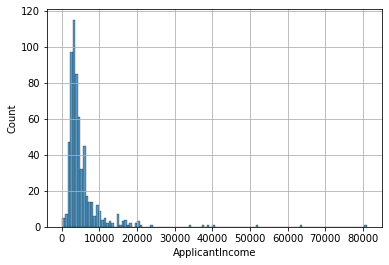

In [ ]:
sns.histplot(df["ApplicantIncome"])
plt.grid()

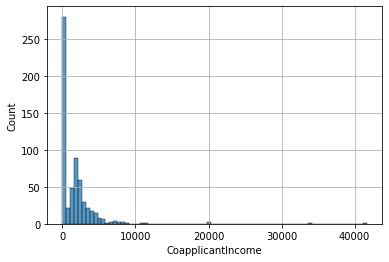

In [ ]:
sns.histplot(df["CoapplicantIncome"])
plt.grid()

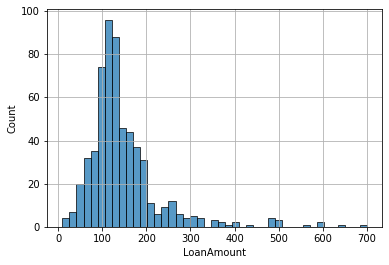

In [ ]:
sns.histplot(df["LoanAmount"])
plt.grid()

**The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed**

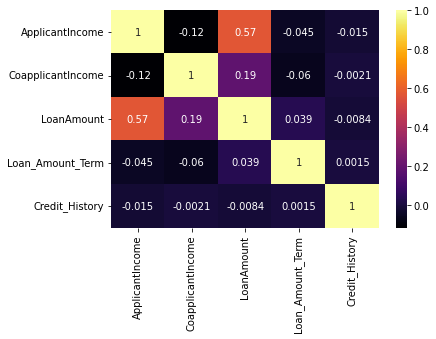

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='inferno')

**#There is positive correlation between Loan Amount and Applicant Income**

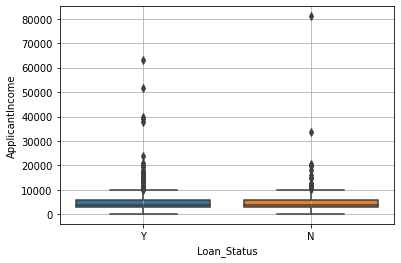

In [ ]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)
plt.grid()

**It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed**

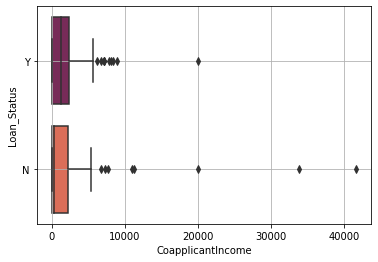

In [ ]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket")
plt.grid()

**It's clear that Co Applicant Income has a number of outliers, and the 
distribution is also positively skewed.**

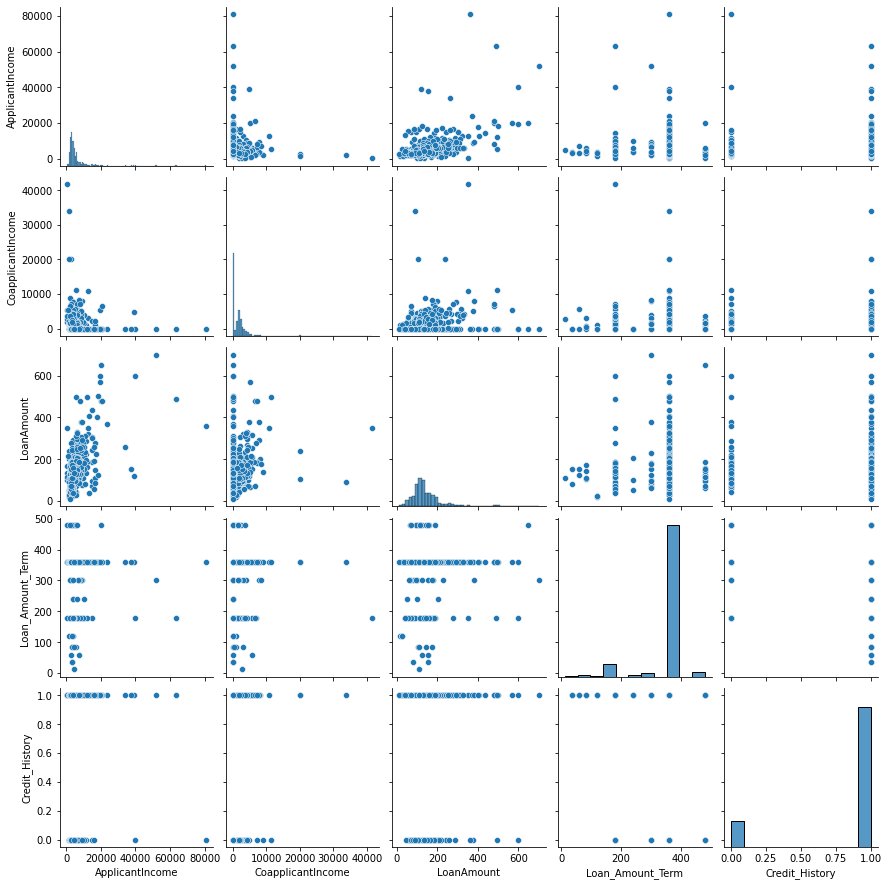

In [ ]:
sns.pairplot(df)

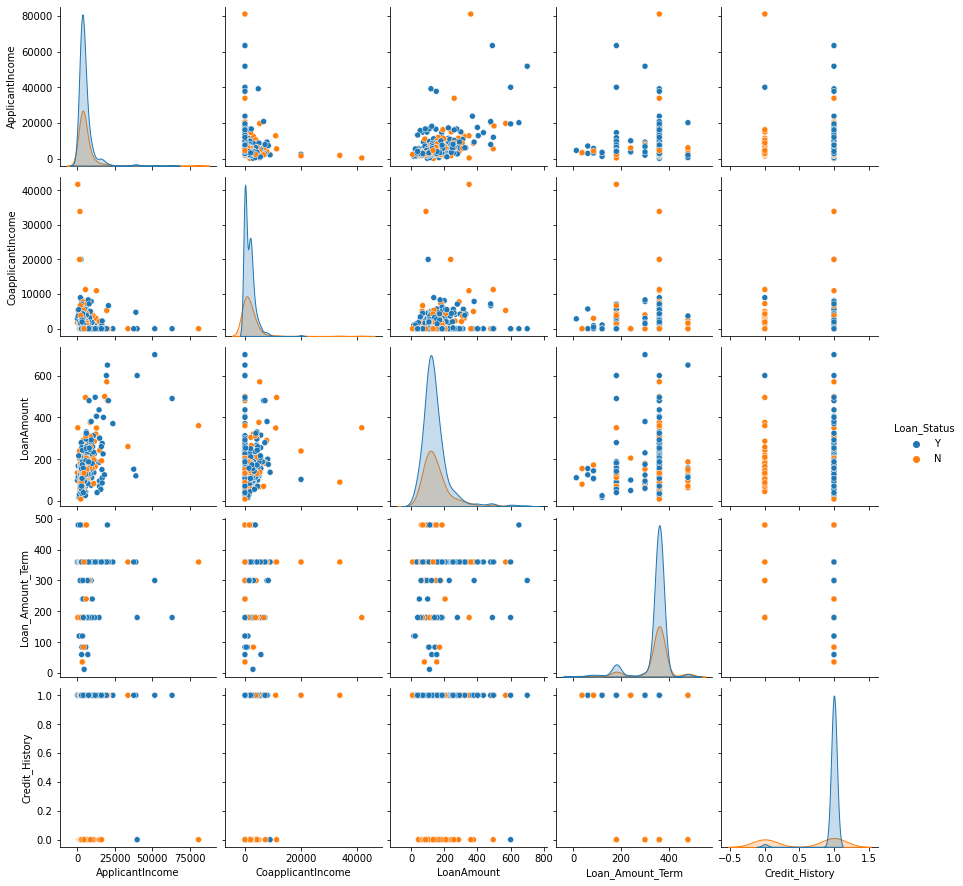

In [ ]:
sns.pairplot(df,hue="Loan_Status")

**#Data Cleaning & preprocessing**

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**For numerical values a good solution is to fill missing values with the mean , for categorical we can fill them with the mode**

missing value below 3% - dropna()

missing value between 3% to 40% - fillna()

missing value above 40% -drop column


In [ ]:
#categorical

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


#numerical
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            573 non-null    object 
 1   Gender             573 non-null    object 
 2   Married            573 non-null    object 
 3   Dependents         573 non-null    object 
 4   Education          573 non-null    object 
 5   Self_Employed      573 non-null    object 
 6   ApplicantIncome    573 non-null    int64  
 7   CoapplicantIncome  573 non-null    float64
 8   LoanAmount         573 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     573 non-null    float64
 11  Property_Area      573 non-null    object 
 12  Loan_Status        573 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.7+ KB


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df["Dependents"].value_counts()

0     327
1     100
2      99
3+     47
Name: Dependents, dtype: int64

In [ ]:
df.replace({"Dependents":{"3+":4}},inplace=True)

df["Dependents"]=df["Dependents"].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            573 non-null    object 
 1   Gender             573 non-null    object 
 2   Married            573 non-null    object 
 3   Dependents         573 non-null    int64  
 4   Education          573 non-null    object 
 5   Self_Employed      573 non-null    object 
 6   ApplicantIncome    573 non-null    int64  
 7   CoapplicantIncome  573 non-null    float64
 8   LoanAmount         573 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     573 non-null    float64
 11  Property_Area      573 non-null    object 
 12  Loan_Status        573 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.7+ KB


In [ ]:
df.drop(['Loan_ID'], axis = 1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


**Converts Categorical Data into Numerical**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["Gender","Married","Education","Self_Employed","Property_Area"]] = oe.fit_transform(df[["Gender","Married","Education","Self_Employed","Property_Area"]])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,Y
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,N
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,Y
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,Y
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,Y


**#Label Encoding**

In [ ]:
df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


**#Skewed Distribution Treatment**

**#In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.**

In [ ]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

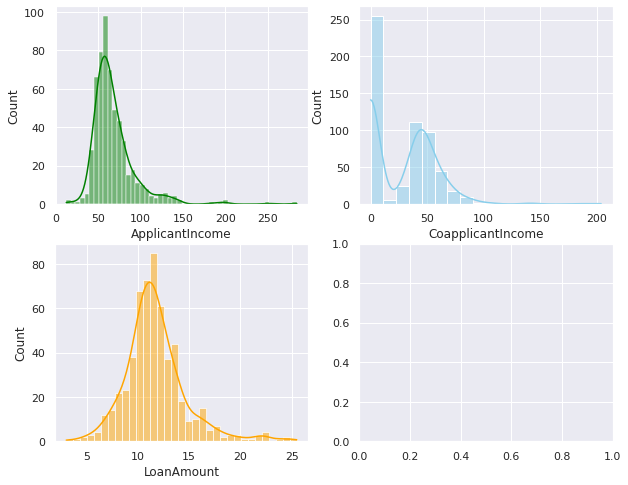

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

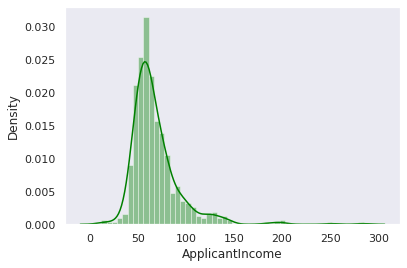

In [ ]:
sns.distplot(df["ApplicantIncome"],color='green')
plt.grid()

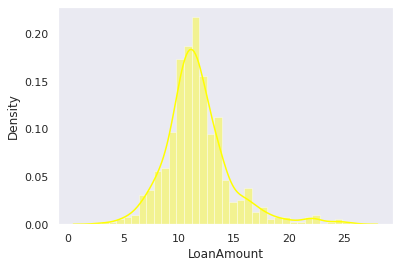

In [ ]:
sns.distplot(df["LoanAmount"],color='yellow')
plt.grid()

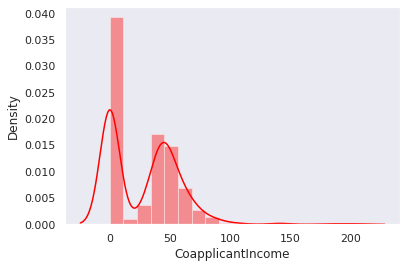

In [ ]:
sns.distplot(df["CoapplicantIncome"],color='red')
plt.grid()

**# As can be seen, the distribution after using log transformation are much better compared to original distribution**

**Spliting Training & testing Data**

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

**Model Building & Evalution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
def mymodel(model):
    #model creation
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #checking bias & variance
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    
    #model evaluation
    print(classification_report(ytest, ypred))
    return model

In [ ]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.7780548628428927
Testing Accuracy : 0.6453488372093024


              precision    recall  f1-score   support

           0       0.30      0.21      0.25        48
           1       0.73      0.81      0.77       124

    accuracy                           0.65       172
   macro avg       0.51      0.51      0.51       172
weighted avg       0.61      0.65      0.62       172



**KNN = Low Bias + High Varience = Over Fitting Result**

In [ ]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.7955112219451371
Testing Accuracy : 0.8081395348837209


              precision    recall  f1-score   support

           0       0.80      0.42      0.55        48
           1       0.81      0.96      0.88       124

    accuracy                           0.81       172
   macro avg       0.80      0.69      0.71       172
weighted avg       0.81      0.81      0.79       172



**Logreg = Low Bias + Low Varience Result**

In [ ]:
svm = mymodel(SVC())

Training Accuracy : 0.683291770573566
Testing Accuracy : 0.7209302325581395


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.72      1.00      0.84       124

    accuracy                           0.72       172
   macro avg       0.36      0.50      0.42       172
weighted avg       0.52      0.72      0.60       172



**KNN = High Bias + low Varience = Under Fitting Result**

In [ ]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.6744186046511628


              precision    recall  f1-score   support

           0       0.44      0.62      0.52        48
           1       0.83      0.69      0.75       124

    accuracy                           0.67       172
   macro avg       0.63      0.66      0.64       172
weighted avg       0.72      0.67      0.69       172



**Low Bias + High Varianece = Overfitting**

**Scaling data** 


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.800498753117207
Testing Accuracy : 0.7906976744186046


              precision    recall  f1-score   support

           0       0.70      0.44      0.54        48
           1       0.81      0.93      0.86       124

    accuracy                           0.79       172
   macro avg       0.75      0.68      0.70       172
weighted avg       0.78      0.79      0.77       172



**KNN = Low bias + Low Varience=79% Accuracy**

In [ ]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.7955112219451371
Testing Accuracy : 0.8081395348837209


              precision    recall  f1-score   support

           0       0.80      0.42      0.55        48
           1       0.81      0.96      0.88       124

    accuracy                           0.81       172
   macro avg       0.80      0.69      0.71       172
weighted avg       0.81      0.81      0.79       172



**Logreg= Low Bias + Low Varience=81% Accuracy**

In [ ]:
svm = mymodel(SVC())

Training Accuracy : 0.8079800498753117
Testing Accuracy : 0.813953488372093


              precision    recall  f1-score   support

           0       0.81      0.44      0.57        48
           1       0.82      0.96      0.88       124

    accuracy                           0.81       172
   macro avg       0.81      0.70      0.72       172
weighted avg       0.81      0.81      0.79       172



**SVM = Low Bias + Low Varience =81% accuracy**

In [ ]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.6744186046511628


              precision    recall  f1-score   support

           0       0.44      0.60      0.51        48
           1       0.82      0.70      0.76       124

    accuracy                           0.67       172
   macro avg       0.63      0.65      0.63       172
weighted avg       0.71      0.67      0.69       172



**Low Bias + High Varianece = Overfitting**

**HyperTunning  model**

In [ ]:
paramaters = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 20)),
    "min_samples_leaf": list(range(1, 20))
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), paramaters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [ ]:
grid.best_score_

0.7929938271604938

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [ ]:
dt = mymodel(grid.best_estimator_)

Training Accuracy : 0.7930174563591023
Testing Accuracy : 0.8197674418604651


              precision    recall  f1-score   support

           0       0.87      0.42      0.56        48
           1       0.81      0.98      0.89       124

    accuracy                           0.82       172
   macro avg       0.84      0.70      0.72       172
weighted avg       0.83      0.82      0.80       172



**Low Bias + Low  Varianece = 82% Accuracy**

**#Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(dt, x,y, cv=5, scoring="accuracy")
cvs

array([0.8       , 0.7826087 , 0.77391304, 0.84210526, 0.80701754])

In [ ]:
cvs.mean()

0.8011289092295957

In [ ]:
print(f"Avg Accuracy : {cvs.mean():.2f}\nSTD : {cvs.std():}")

Avg Accuracy : 0.80
STD : 0.023658882875825533


**Forecasting the Model**

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,76.478755,0.000000,12.100089,360.0,1.0,2.0,1
1,1.0,1.0,1,0.0,0.0,67.697858,38.832976,11.313708,360.0,1.0,0.0,0
2,1.0,1.0,0,0.0,1.0,54.772256,0.000000,8.124038,360.0,1.0,2.0,1
3,1.0,1.0,0,1.0,0.0,50.823223,48.559242,10.954451,360.0,1.0,2.0,1
4,1.0,0.0,0,0.0,0.0,77.459667,0.000000,11.874342,360.0,1.0,2.0,1


In [ ]:
def Loan_Approval():
  Gender=input("Enter  gender:-")
  Married=input("Enter Marridial status:")
  Dependents=int(input("enter no. of Dependants:-"))
  Education=input("Enter Education:-")
  Self_Employed=input("enter self employee:-")
  ApplicantIncome=float(input("enter applicant income:-"))
  CoapplicantIncome=float(input("enter Coapplicantincome:-"))
  loanAmount=float(input("enter loan_amount:-"))
  Loan_Amount_Term=float(input("enter Loan_Amount_Term:-"))
  Credit_History=int(input("Enter credit history:-"))
  Property_Area=input("Enter Property_area:-")



  newx=[Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,loanAmount,Loan_Amount_Term,Credit_History,Property_Area]
  newx[0],newx[1],newx[3],newx[4],newx[-1]=oe.transform([[newx[0],newx[1],newx[3],newx[4],newx[-1]]])[0]
  v=logreg.predict([newx])[0]

  if (v==1):
    print(f"\n Customer Loan Approvals")
  else:
    print(f"\n Customer Loan Rejected")